## Probability Distributions

#### Class Objectives
- Discrete Probability Distributions
    - Bernoulli
    - Binomial
    - Poisson
- Continuous Probability Distributions
    - Uniform
    - Exponential
    - Gaussian
- scipy.stats

In [56]:
from matplotlib import pyplot as plt
import numpy as np
from math import factorial

### Random Variables
- Sample Space (Ω): Set of all possible outcomes.
- Outcomes may not have the same probability


- The probability of each outcome is specified via a random variable X.
- A random variable X is a function from Ω to real numbers ℝ

#### A fair coin
- Ω = {H,T}

P(H) = 1/2

P(T) = 1/2

#### A biased coin
- Ω = {H,T}

P(H) = 65/100

P(T) = 35/100

In [1]:
## City of Birth
classroom_cob = ["Toledo", "Luxembourg", "Caracas", "Savannah", "Guadalajara", "Madrid", "Valencia", "Madrid", "Madrid", "Madrid", "Cordoba", "Madrid", "Madrid", "Madrid", "Barcelona", "Madrid", "Madrid", "Granada", "Valencia", "Sevilla", "Santos"]

In [2]:
ss = set(classroom_cob)

In [4]:
for city in ss:
    print(f"P(x = {city}) = {classroom_cob.count(city)}/{len(classroom_cob)}")

P(x = Toledo) = 1/21
P(x = Savannah) = 1/21
P(x = Madrid) = 9/21
P(x = Barcelona) = 1/21
P(x = Luxembourg) = 1/21
P(x = Guadalajara) = 1/21
P(x = Cordoba) = 1/21
P(x = Caracas) = 1/21
P(x = Granada) = 1/21
P(x = Santos) = 1/21
P(x = Valencia) = 2/21
P(x = Sevilla) = 1/21


### Discrete vs. Continuous
- Discrete
    - Outcome is one of the values defined on Ω, a finite number of different values.
    - Ω = {1,2,3,4,5,6,7,8,9,10}
    - Ex.: Television volume, colours, coins, dice 
- Continuous
    - Outcome may be any value on a given range
    - Ω = [-50,50]
    - Ex.: Temperature, time, speed, etc..

## Discrete probability distributions
- X is a discrete random variable.
- X follows a discrete probability distribution.

#### Probability distribution -> Probability Mass Function (PMF)
$X:Ω \rightarrow ℝ$

### [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution)

- 2 possible outcomes
- Probability of success:
    - p = p
    - q = 1-p

In [13]:
### A coin
# 1 = Heads
ss = {0,1}
p = .5

In [14]:
from scipy.stats import bernoulli
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html
# .rvs for generating random samples

In [27]:
# samples = [bernoulli.rvs(p) for _ in range(10_000)]
samples = bernoulli.rvs(p,size=10_000)

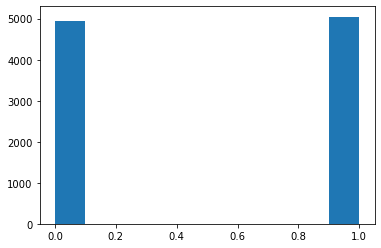

In [28]:
plt.hist(samples);

In [30]:
### Biased coin
p = 0.8

# Create a bernoulli object
unfair_coin = bernoulli(p)

In [32]:
sample = unfair_coin.rvs(size=10_000)

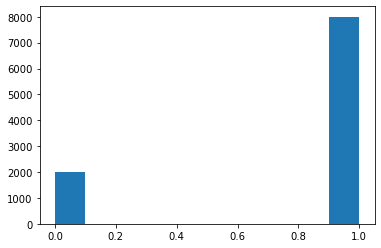

In [34]:
plt.hist(sample);

### Binomial Distribution
- Probability of having `k` successes in `n` total trials of Bernoulli with probability `p`.

$X \sim Binomial(n,p)$

In [37]:
from scipy.stats import binom
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [40]:
# Probability of getting 10 heads in 10 coin tosses
(1/2)**10

0.0009765625

In [43]:
# Experiment: 10 coin tosses
# Success = Heads
p = 0.5
n = 10
## Ω = {0,1,2,3,4,..., N-1, N}

$P(X = N) = p^N$

$P(X = 0) = (1-p)^N$

$P(X=k) = ?$

$P(X = k) = {N\choose k}p^k(1-p)^{N-k}$

In [53]:
k = 3
n_comb = factorial(n)/(factorial(n-k)*factorial(k))
(p**k)*((1-p)**(n-k))*n_comb

0.1171875

In [45]:
coins_10 = binom(n,p)

In [46]:
samples = coins_10.rvs(size=10_000)

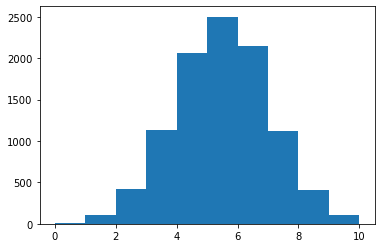

In [48]:
plt.hist(samples);

In [50]:
list(samples).count(3)/len(samples)

0.113

In [54]:
coins_10.pmf(k=3)

0.11718750000000014

In [58]:
k = np.arange(0,11,1)

In [79]:
P = binom.pmf(k=k, n=10, p=.5)

In [80]:
P

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507813,
       0.24609375, 0.20507813, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656])

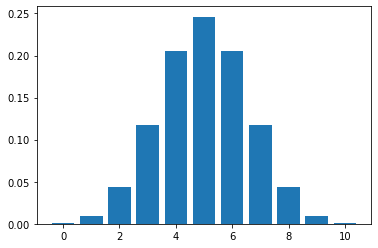

In [81]:
plt.bar(k,P);

### Cumulative Distribution Function (CDF)
- PMF -> Exactly k successes
- CDF -> At most k successes

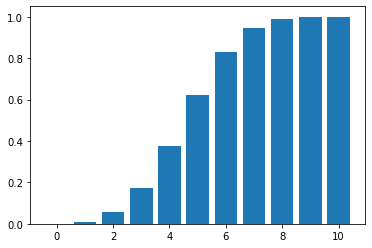

In [82]:
P_c = binom.cdf(k=k, n=10, p=.5)
plt.bar(k,P_c);

In [85]:
cdf = []
for i in range(len(P)):
    cdf.append(sum(P[:i+1]))

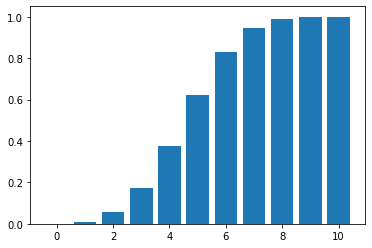

In [86]:
plt.bar(k,cdf);

### Poisson
- Is used to predict how many times a certain event might ocur in a given time frame

#### Ex.:
    - Number of car crashes in Madrid in a year
    - How many days it will rain on a week
    - How many students will enroll on a semester
    
#### λ
- Theoretical average ocurrences

In [89]:
from scipy.stats import poisson

In [92]:
# 1007 fatal accidents in 2019
# λ = 2.758904109589041 accidents/day
mu = 1007/365
fatal_accidents_Madrid = poisson(mu=mu)

In [93]:
fatal_accidents_Madrid.rvs(size=5)

array([3, 2, 3, 2, 0])

In [97]:
k = np.arange(0,10,1)
P_0_10 = fatal_accidents_Madrid. pmf(k)

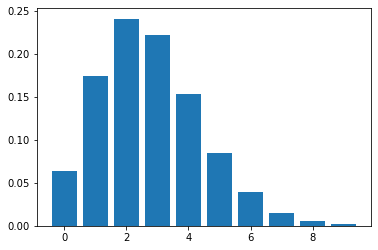

In [99]:
plt.bar(k,P_0_10);

In [100]:
1007/365

2.758904109589041

### More on discrete distributions
![](https://camo.githubusercontent.com/03dfae45624faa6f0c23975a98f27b359a6ad398/68747470733a2f2f7777772e64756d6d6965732e636f6d2f77702d636f6e74656e742f75706c6f6164732f3235303437342e696d616765302e6a7067)

## Continuous Distributions
- X is a continuous random variable.
- X follows a continuous probability distribution.

$Ω = \{{a}\le{x}\le{b}\}$ for every x in E ℝ
    
   - `a` and `b` may be infinite

$P(X)$

### Uniform Distribution

In [101]:
from scipy.stats import uniform

In [106]:
uniform.rvs()

0.12202579990197937

In [134]:
x = np.linspace(0,1,100)

In [135]:
pdf = uniform.pdf(x)

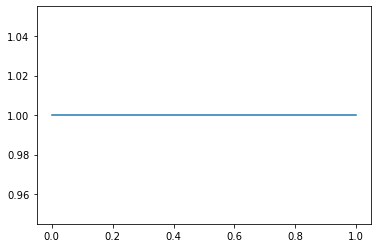

In [136]:
plt.plot(x,pdf);

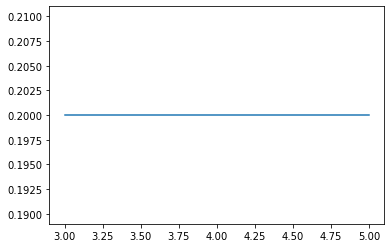

In [120]:
a = 3
b = 5
x = np.linspace(a,b,100)
y = uniform.pdf(x,a,b)
plt.plot(x,y)

### Exponential Distribution

- Models distributions where each unit of time has an equal probability

In [139]:
from scipy.stats import expon

In [143]:
x = np.linspace(0,10,1000)
pdf = expon.pdf(x)

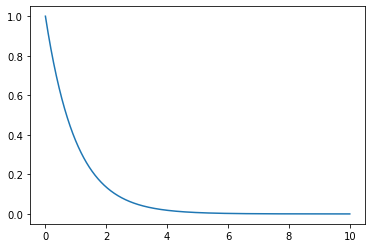

In [145]:
plt.plot(x,pdf);

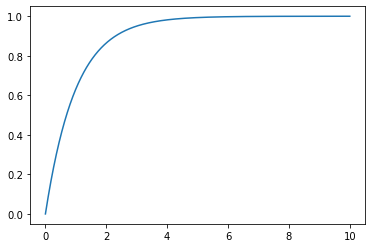

In [147]:
plt.plot(x,expon.cdf(x));

In [174]:
# X -> time a cashier spends with a customer
mean = 5
cashier = expon(scale=mean)

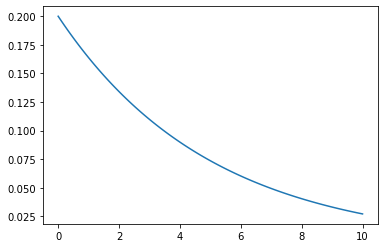

In [175]:
x = np.linspace(0,10,100)
plt.plot(x,cashier.pdf(x));

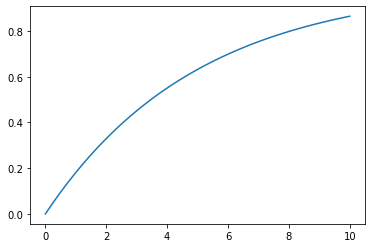

In [176]:
plt.plot(x,cashier.cdf(x));

In [177]:
b=6
a=4
### Probability that the cashier spends between 4 and 6 minutes


cashier.cdf(b)-cashier.cdf(a)

0.14813475220501937

### Gaussian Distribution

In [183]:
from scipy.stats import norm

In [184]:
normal = norm()

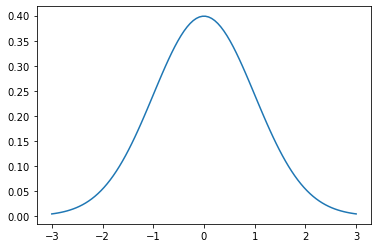

In [186]:
x = np.linspace(-3,3,100)
plt.plot(x,norm.pdf(x));

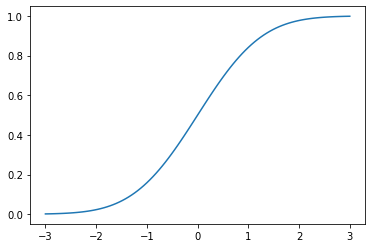

In [187]:
x = np.linspace(-3,3,100)
plt.plot(x,norm.cdf(x));

In [188]:
import pandas as pd

### Checking some data

In [189]:
df = pd.read_csv("data/titanic.csv")

In [226]:
age = df["age"].dropna()

In [237]:
std = age.describe()["std"]
mean = age.describe()["mean"]
median = age.median()

In [240]:
median,mean

(28.0, 29.8811345124283)

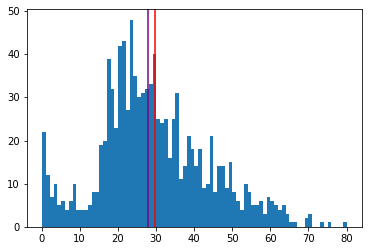

In [239]:
plt.hist(age, bins=80)
plt.axvline(mean,color="red")
plt.axvline(median,color="purple");

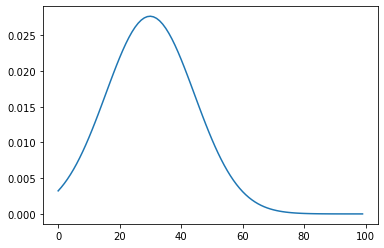

In [242]:
age = norm(mean, std)
x = np.arange(0,100)
plt.plot(x, age.pdf(x));

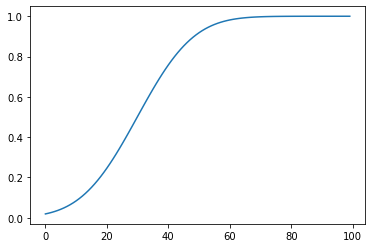

In [243]:
plt.plot(x, age.cdf(x));

In [244]:
age.cdf(28)

0.448080684761376